In [4]:
import pandas as pd
import numpy as np
import re

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy

import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

import glob
import os


In [3]:
pip install wordcloud

In [2]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [6]:
df = pd.read_csv('/content/drive/MyDrive/final project/MarketApp/NLP/preprocessed_amazon.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


#Generating embeddings of the product titles


In [8]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_name = df['Product Title']
embeddings = model.encode(product_name, show_progress_bar=True).astype('float32')





/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/721 [00:00<?, ?it/s]

In [9]:
embeddings.shape

(23066, 384)

# To visualize the clustering of sentence embeddings reduced to 2 dimensions, I am finding the optimal number of clusters using the Elbow method.

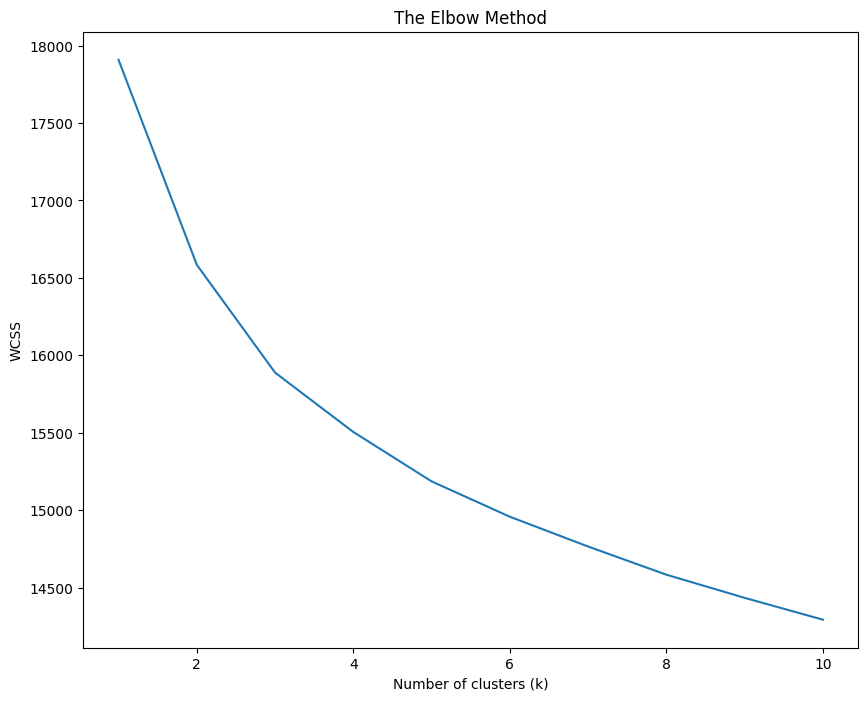

In [10]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):  # Test k from 1 to 10, you can adjust this range depending on your data
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=340)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

#I am using k-means and pca to visualize the embeddings.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Shape of PCA-reduced embeddings: (23066, 2)


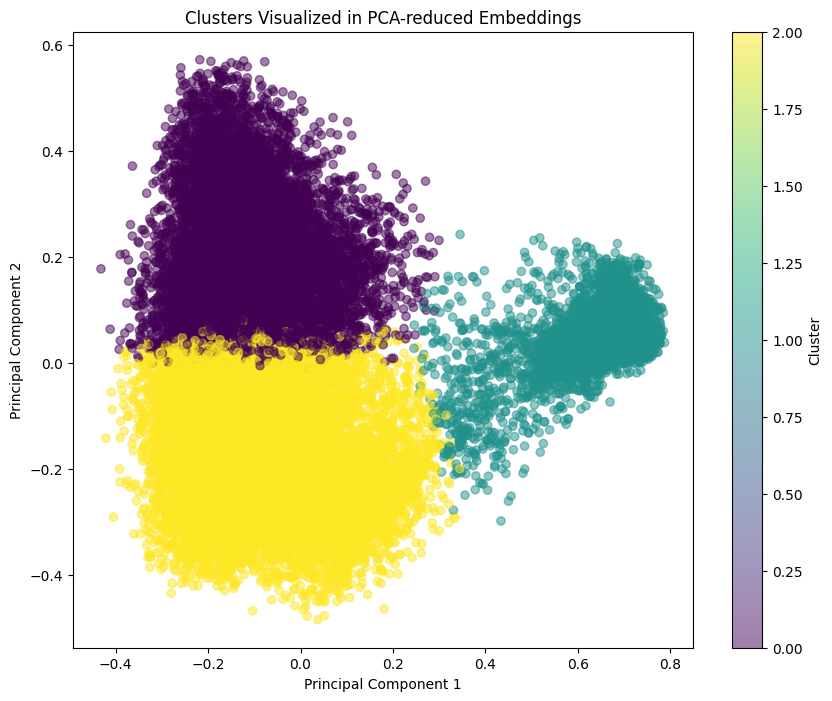

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Fit K-Means on Original Embeddings
kmeans = KMeans(n_clusters=3, random_state=340)
clusters = kmeans.fit_predict(embeddings)

# Step 2: Apply PCA to Reduce Dimensionality for Visualization
pca = PCA(n_components=2)
compressed_embeddings = pca.fit_transform(embeddings)

print("Shape of PCA-reduced embeddings:", compressed_embeddings.shape)

# Step 3: Visualize Clusters on PCA-Reduced Data
plt.figure(figsize=(10, 8))
plt.scatter(compressed_embeddings[:, 0], compressed_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters Visualized in PCA-reduced Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



#Generate a word cloud to see what words are in each clusters

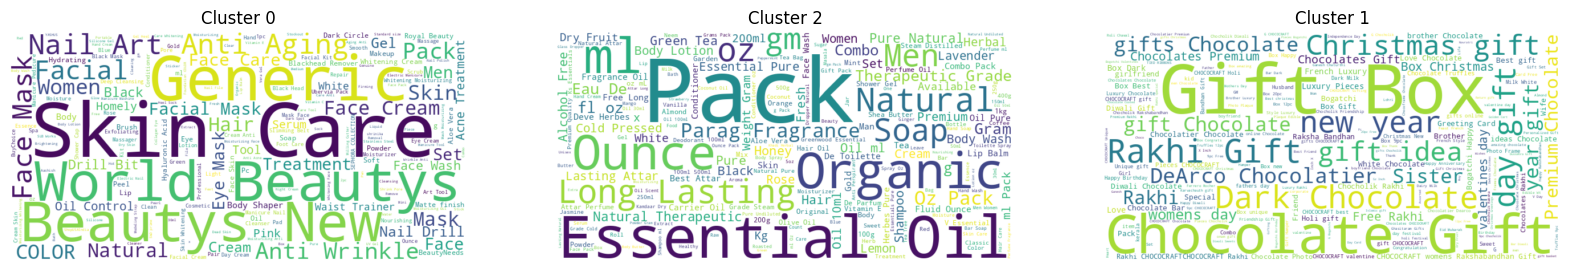

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cluster_texts = defaultdict(str)

for text, label in zip(df['Product Title'], clusters):
    cluster_texts[label] += " " + text

plt.figure(figsize=(20, 10))

for i, (label, text) in enumerate(cluster_texts.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(1, len(cluster_texts), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")

plt.show()

#I am using cosine similarity for nearest neighbor search

In [18]:


def recommend(query, embeddings, product_names, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    top_indices = np.argsort(-similarities)[:top_k]

    print("Top recommendations:")
    for i, idx in enumerate(top_indices):
        print(f"{i + 1}: {product_names[idx]} (Similarity Score: {similarities[idx]})")

query_product_name = "pore cleanser"
recommend(query_product_name, embeddings, product_name, top_k=20)


Top recommendations:
1:  Dr. Schrammek Deep Pore Cleanser Regulating  (Similarity Score: 0.7194427847862244)
2:  Epielle Deep Pore Charcoal Cleanser  (Similarity Score: 0.6994414925575256)
3:  Mini Electric Facial Pore Cleanser Skin Cleaner Face Dirt Suck Up Tool  (Similarity Score: 0.692294716835022)
4:  Hansel Brush Face Wash Brushes Deep Clean Pore Facial Cleanser Brush(1)  (Similarity Score: 0.6739605665206909)
5:  Cute Silicone Facial Cleaning Brush Deep Pore Cleaning Exfoliator Face Washing Brush Skin Care  (Similarity Score: 0.6701419949531555)
6:  Hansel Blackhead Remover Skin Care Face Acne Clean Pore Cleaner  (Similarity Score: 0.6677912473678589)
7:  Shrinika Blackhead Remover Facial Pore Cleaner Electric Cleansing Tool  (Similarity Score: 0.6650842428207397)
8:  Electric Facial Pore Cleanser BlackHead Cleaner Acne Removal Vacuum Suction  (Similarity Score: 0.6648898124694824)
9:  Hansel 1Pc Amino Acid Bubble Moisturizing Facial Pore Cleanser(3)  (Similarity Score: 0.6599334

In [23]:


def recommend(query, embeddings, product_names, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    top_indices = np.argsort(-similarities)[:top_k]

    print("Top recommendations:")
    for i, idx in enumerate(top_indices):
        print(f"{i + 1}: {product_names[idx]} (Similarity Score: {similarities[idx]})")

query_product_name = "purple phone case"
recommend(query_product_name, embeddings, product_name, top_k=20)

Top recommendations:
1:  MyBat Wallet Case Samsung G935 (Galaxy S7 Edge) - Retail Packaging - Transparent/Pink  (Similarity Score: 0.5443415641784668)
2:  Generic Purple, L : Yel 2 pcs Top Basketball Bracer Bar Lengthen Armguards Sunscreen Sports Protective Forearm Elbow Pad Sleeve Arm Warmers  (Similarity Score: 0.49299490451812744)
3:  Colour Me Eau De Toilette (Purple), 50ml  (Similarity Score: 0.47872394323349)
4:  Generic purple: 4cm Nail Art Colorful Stamper Scraper Plate Jelly Silicone Round Head UV Gel Polish Tip DIY Image Transfer Painting Manicure Kit  (Similarity Score: 0.46897804737091064)
5:  Generic Purple : 1pcs Women Travel Soft Silk Filled Sleeping Aids Eye Mask Cover Shade Blindfold Rest Shield 21.5*11cm Hot Selling1  (Similarity Score: 0.4648866653442383)
6:  Purple : ecoLove Purple Collection Conditioner for colored and very dry hair - Blueberry, Grape & Lavender. 100% VEGAN (17.6 Oz)  (Similarity Score: 0.45398926734924316)
7:  Purple : Userful Practical Men Women 

In [24]:


def recommend(query, embeddings, product_names, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    top_indices = np.argsort(-similarities)[:top_k]

    print("Top recommendations:")
    for i, idx in enumerate(top_indices):
        print(f"{i + 1}: {product_names[idx]} (Similarity Score: {similarities[idx]})")

query_product_name = "Korean facial mask"
recommend(query_product_name, embeddings, product_name, top_k=20)

Top recommendations:
1:  Korea Mediheal P.D.F AC-Dressing Ampoule Mask 1box 1sheet  (Similarity Score: 0.7067000865936279)
2:  PREMIUM FACIAL MASK (10PK) - COLLAGEN  (Similarity Score: 0.6866281032562256)
3:  Dermal Korea Acai Berry Collagen Essence Face Mask (Pack of 5)  (Similarity Score: 0.6816632747650146)
4:  Royal Beauty KIWI : 3pcs/lot Its Real Squeeze Mask Sheet 12 types for choice Korea Cosmetics Facial Mask  (Similarity Score: 0.679235577583313)
5:  AHC Vital C Complex Cellulose Mask 5PCS: Whitening Enhancer Face Mask - Made In Korea  (Similarity Score: 0.6713994741439819)
6:  MIRABELLE KOREA COCONUT ESSENTIAL FACIAL SHEET MASK (A PACK OF 2)  (Similarity Score: 0.6666732430458069)
7:  Kosmo Skin Brite Mask  (Similarity Score: 0.6647814512252808)
8:  MIRABELLE KOREA SANDALWOOD ULTRA FACIAL SHEET MASK (25 ml)  (Similarity Score: 0.660469114780426)
9:  Aphrodite Face Mask  (Similarity Score: 0.653331995010376)
10:  Royal Beauty Best Korea Cosmetics Secriss Pure Nature Mask 10pcs

#I am using the faiss  for nearest neighbor search, instead of cosine similairty to see if has better results

In [16]:
!pip install faiss-cpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 18.4 MB/s eta 0:00:00


In [17]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_names = df['Product Title'].values

embeddings = model.encode(product_names, show_progress_bar=True).astype('float32')

index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)


Batches:   0%|          | 0/721 [00:00<?, ?it/s]

In [20]:

def recommend_faiss(query, index, product_names, model, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    query_embedding = query_embedding.reshape(1, -1)

    # Perform search on the FAISS index
    distances, indices = index.search(query_embedding, top_k + 1)

    # Prepare and print recommendations
    recommendations = []
    print("Top recommendations:")
    for i, idx in enumerate(indices[0][1:]):  # Skip the first result as it is the query itself
        product_name = product_names[idx]
        similarity_score = 1 - distances[0][i + 1]  # Convert distance to similarity
        recommendations.append((product_name, similarity_score))
        print(f"{i + 1}: {product_name} (Similarity Score: {similarity_score:.4f})")

    return recommendations

# Example usage of the function
query_product_name = "pore cleanser"
recommendations = recommend_faiss(query_product_name, index, product_names, model, top_k=20)

Top recommendations:
1:  Epielle Deep Pore Charcoal Cleanser  (Similarity Score: 0.3989)
2:  Mini Electric Facial Pore Cleanser Skin Cleaner Face Dirt Suck Up Tool  (Similarity Score: 0.3846)
3:  Hansel Brush Face Wash Brushes Deep Clean Pore Facial Cleanser Brush(1)  (Similarity Score: 0.3479)
4:  Cute Silicone Facial Cleaning Brush Deep Pore Cleaning Exfoliator Face Washing Brush Skin Care  (Similarity Score: 0.3403)
5:  Hansel Blackhead Remover Skin Care Face Acne Clean Pore Cleaner  (Similarity Score: 0.3356)
6:  Shrinika Blackhead Remover Facial Pore Cleaner Electric Cleansing Tool  (Similarity Score: 0.3302)
7:  Electric Facial Pore Cleanser BlackHead Cleaner Acne Removal Vacuum Suction  (Similarity Score: 0.3298)
8:  Hansel 1Pc Amino Acid Bubble Moisturizing Facial Pore Cleanser(3)  (Similarity Score: 0.3199)
9:  Designeez Mini Electric Facial Pore Cleanser Face Dirt Suck Up Vacuum Acne Pimple Tool Remover Blackhead Clean Massage Tools  (Similarity Score: 0.3152)
10:  Generic Mi

In [21]:
def recommend_faiss(query, index, product_names, model, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    query_embedding = query_embedding.reshape(1, -1)

    # Perform search on the FAISS index
    distances, indices = index.search(query_embedding, top_k + 1)

    # Prepare and print recommendations
    recommendations = []
    print("Top recommendations:")
    for i, idx in enumerate(indices[0][1:]):  # Skip the first result as it is the query itself
        product_name = product_names[idx]
        similarity_score = 1 - distances[0][i + 1]  # Convert distance to similarity
        recommendations.append((product_name, similarity_score))
        print(f"{i + 1}: {product_name} (Similarity Score: {similarity_score:.4f})")

    return recommendations

# Example usage of the function
query_product_name = "Korean facial mask"
recommendations = recommend_faiss(query_product_name, index, product_names, model, top_k=20)

Top recommendations:
1:  PREMIUM FACIAL MASK (10PK) - COLLAGEN  (Similarity Score: 0.3733)
2:  Dermal Korea Acai Berry Collagen Essence Face Mask (Pack of 5)  (Similarity Score: 0.3633)
3:  Royal Beauty KIWI : 3pcs/lot Its Real Squeeze Mask Sheet 12 types for choice Korea Cosmetics Facial Mask  (Similarity Score: 0.3585)
4:  AHC Vital C Complex Cellulose Mask 5PCS: Whitening Enhancer Face Mask - Made In Korea  (Similarity Score: 0.3428)
5:  MIRABELLE KOREA COCONUT ESSENTIAL FACIAL SHEET MASK (A PACK OF 2)  (Similarity Score: 0.3333)
6:  Kosmo Skin Brite Mask  (Similarity Score: 0.3296)
7:  MIRABELLE KOREA SANDALWOOD ULTRA FACIAL SHEET MASK (25 ml)  (Similarity Score: 0.3209)
8:  Aphrodite Face Mask  (Similarity Score: 0.3067)
9:  Royal Beauty Best Korea Cosmetics Secriss Pure Nature Mask 10pcs / lot (of each types) Skin Care Facial Mask Sheet 3D Moisture Face Mask  (Similarity Score: 0.3034)
10:  COGIT Small Face Sauna Mask  (Similarity Score: 0.3033)
11:  Malie Korea Mask Placenta Pac

In [22]:
def recommend_faiss(query, index, product_names, model, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    query_embedding = query_embedding.reshape(1, -1)

    # Perform search on the FAISS index
    distances, indices = index.search(query_embedding, top_k + 1)

    # Prepare and print recommendations
    recommendations = []
    print("Top recommendations:")
    for i, idx in enumerate(indices[0][1:]):  # Skip the first result as it is the query itself
        product_name = product_names[idx]
        similarity_score = 1 - distances[0][i + 1]  # Convert distance to similarity
        recommendations.append((product_name, similarity_score))
        print(f"{i + 1}: {product_name} (Similarity Score: {similarity_score:.4f})")

    return recommendations

# Example usage of the function
query_product_name = "purple phone case"
recommendations = recommend_faiss(query_product_name, index, product_names, model, top_k=20)

Top recommendations:
1:  Generic Purple, L : Yel 2 pcs Top Basketball Bracer Bar Lengthen Armguards Sunscreen Sports Protective Forearm Elbow Pad Sleeve Arm Warmers  (Similarity Score: -0.0140)
2:  Colour Me Eau De Toilette (Purple), 50ml  (Similarity Score: -0.0426)
3:  Generic purple: 4cm Nail Art Colorful Stamper Scraper Plate Jelly Silicone Round Head UV Gel Polish Tip DIY Image Transfer Painting Manicure Kit  (Similarity Score: -0.0620)
4:  Generic Purple : 1pcs Women Travel Soft Silk Filled Sleeping Aids Eye Mask Cover Shade Blindfold Rest Shield 21.5*11cm Hot Selling1  (Similarity Score: -0.0702)
5:  Purple : ecoLove Purple Collection Conditioner for colored and very dry hair - Blueberry, Grape & Lavender. 100% VEGAN (17.6 Oz)  (Similarity Score: -0.0920)
6:  Purple : Userful Practical Men Women Magnetic Health Care Bracelet Fashionable Slimming Body Health Weight Loss Bracelet Top  (Similarity Score: -0.0934)
7:  Stockout INC.REDIBLE Jelly Shot Heart Lip Quencher - COLOR: Share

##I am creating a new reccomendation system based on user interactions.

In [ ]:
import os
import glob

directory_path = '/content/drive/MyDrive/final project/interactionpost/'
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)



combined_df

,id,query,liked_post,has_messaged,username,post
0,23,vegetation,False,False,TonyChopper,NaN
1,35,NaN,False,True,TonyChopper,Everin Nutri High Protein and Healthy SOYA Gr...
2,39,mask,False,False,TonyChopper,NaN
3,47,NaN,False,True,TonyChopper,Ayur Deep Pure Cleansing Milk 100 ML(Pack of 3)
4,50,chestnut,False,False,TonyChopper,NaN
...,...,...,...,...,...,...
3567,4004,oldie,False,False,ItachiUchiha,NaN
3568,4005,afford,False,False,ItachiUchiha,NaN
3569,4007,ride,False,False,ItachiUchiha,NaN
3570,4014,NaN,True,False,ItachiUchiha,Khadi Pure Lemongrass and Nutmeg Essential Oi...


In [ ]:


def recommend_items(username):
    directory_path = '/content/drive/MyDrive/final project/interactionpost/'
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

    #calling all the user interaction data sets.
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    #concatenate all DataFrames into one
    df = pd.concat(dataframes, ignore_index=True)

    #creating a new column that adds a value 1 if either liked_post or has_message is 1
    df['interaction'] = df[['liked_post', 'has_messaged']].max(axis=1)

    # creating a user-item interaction matrix
    interaction_matrix = df.pivot_table(index='username', columns='post', values='interaction', fill_value=0)

    # calculating the cosine similarity matrix
    similarity_matrix = cosine_similarity(interaction_matrix)

    # converting similarity matrix to DataFrame with usernames as indices
    similarity_df = pd.DataFrame(similarity_matrix, index=interaction_matrix.index, columns=interaction_matrix.index)

    # checking if the username exists in the similarity dataFrame
    if username in similarity_df.index:
        # Get similar users, sorted by similarity score, excluding the user themselves
        similar_users = similarity_df[username].sort_values(ascending=False)[1:]

        # Initialize a set to collect recommended items
        recommended_items = set()

        # Iterate over similar users to collect their liked or messaged posts
        for user in similar_users.index:
            user_posts = df[(df['username'] == user) & (df['interaction'] == 1)]['post'].tolist()
            recommended_items.update(user_posts)

        # Remove items already interacted with by the given username
        user_interacted_posts = df[(df['username'] == username) & (df['interaction'] == 1)]['post'].tolist()
        recommended_items.difference_update(user_interacted_posts)

        # Convert set of recommended items to a sorted list
        recommended_list = sorted(list(recommended_items))

        # Display the top 5 recommendations
        print(f"Top 5 recommended posts for {username}:")
        for item in recommended_list[:5]:
            print(item)
    else:
        print(f"User '{username}' not found. Please check the username.")





In [ ]:
def recommend_for_all_users(directory_path, top_k=5):
    # Load all CSV files into a list of DataFrames
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames into one
    df = pd.concat(dataframes, ignore_index=True)

    # Create a combined interaction column
    df['interaction'] = df[['liked_post', 'has_messaged']].max(axis=1)

    # Create a user-item interaction matrix
    interaction_matrix = df.pivot_table(index='username', columns='post', values='interaction', fill_value=0)

    # Calculate the cosine similarity matrix
    similarity_matrix = cosine_similarity(interaction_matrix)

    # Convert similarity matrix to DataFrame with usernames as indices
    similarity_df = pd.DataFrame(similarity_matrix, index=interaction_matrix.index, columns=interaction_matrix.index)

    print(similarity_df)

    # Get the list of all unique users
    all_users = interaction_matrix.index.tolist()

    # Generate recommendations for each user
    for username in all_users:
        print(f"\nRecommendations for user: {username}")
        recommend_items(username)
# Example usage of the function for all users
directory_path = '/content/drive/MyDrive/final project/interactionpost/'
recommend_for_all_users(directory_path, top_k=5)

username       BorutoUzumaki  ItachiUchiha  NarutoUzumaki    Pillow  \
username                                                              
BorutoUzumaki       1.000000      0.000000       0.018391  0.004789   
ItachiUchiha        0.000000      1.000000       0.009092  0.009470   
NarutoUzumaki       0.018391      0.009092       1.000000  0.004800   
Pillow              0.004789      0.009470       0.004800  1.000000   
TonyChopper         0.004674      0.009242       0.004684  0.014639   
admin               0.013988      0.000000       0.004673  0.009736   
clstrey             0.009010      0.008909       0.009031  0.004704   
jrhee01             0.008818      0.030513       0.013257  0.023014   

username       TonyChopper     admin   clstrey   jrhee01  
username                                                  
BorutoUzumaki     0.004674  0.013988  0.009010  0.008818  
ItachiUchiha      0.009242  0.000000  0.008909  0.030513  
NarutoUzumaki     0.004684  0.004673  0.009031  0.013